In [101]:
import requests
import pandas as pd
import re
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt

In [102]:
website_url = 'https://countrymusichalloffame.org/hall-of-fame/members/'
response = requests.get(website_url)
response.status_code

200

In [103]:
print(type(response))
response.content

<class 'requests.models.Response'>


b'<!DOCTYPE html>\n<html lang="en-US">\n<head>\t\n<!-- Google Tag Manager -->\n\n<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\n\nnew Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\n\nj=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src=\n\n\'https://www.googletagmanager.com/gtm.js?id=\'+i+dl;f.parentNode.insertBefore(j,f);\n\n})(window,document,\'script\',\'dataLayer\',\'GTM-TVMMMDC\');</script>\n\n<!-- End Google Tag Manager -->\n<meta charset="UTF-8" />\n<meta name=\'viewport\' content=\'width=device-width, initial-scale=1.0\' />\n<meta http-equiv=\'X-UA-Compatible\' content=\'IE=edge\' />\n<link rel="profile" href="https://gmpg.org/xfn/11" />\n<link rel="pingback" href="https://countrymusichalloffame.org/wp/xmlrpc.php" />\n<!--[if lt IE 9]>\n\t<script src="https://countrymusichalloffame.org/content/themes/bb-theme/js/html5shiv.js"></script>\n\t<script src="https://countrymusichalloffame.org/content/themes/bb-them

In [104]:
soup = BeautifulSoup(response.content, 'lxml')
print(soup.title)

<title>Hall of Fame Members | Country Music Hall of Fame</title>


In [105]:
names = soup.find_all('div', attrs = {'class': 'vertical-card_content--title'})
dates = soup.find_all('div', attrs = {'class': 'vertical-card_content--copy'})

In [106]:
names2=soup.find_all('h3')
names2

[<h3>Roy Acuff</h3>,
 <h3>Alabama</h3>,
 <h3>Bill Anderson</h3>,
 <h3>Eddy Arnold</h3>,
 <h3>Chet Atkins</h3>,
 <h3>Gene Autry</h3>,
 <h3>DeFord Bailey</h3>,
 <h3>Bobby Bare</h3>,
 <h3>Johnny Bond</h3>]

In [107]:
artist = []
for i in range(len(names2)):
    name = names2[i].get_text().strip()
    artist.append(name)
print(artist)

['Roy Acuff', 'Alabama', 'Bill Anderson', 'Eddy Arnold', 'Chet Atkins', 'Gene Autry', 'DeFord Bailey', 'Bobby Bare', 'Johnny Bond']


In [108]:
inducted = []
for i in range(len(dates)):
    date = dates[i].get_text().replace('\n', '').replace('Inducted ', '').strip()
    inducted.append(date)
print(inducted)

['1962', '2005', '2001', '1966', '1973', '1969', '2005', '2013', '1999']


In [109]:
hof = pd.DataFrame(list(zip(artist, inducted)), columns=['name', 'inducted'])
hof

,name,inducted
0,Roy Acuff,1962
1,Alabama,2005
2,Bill Anderson,2001
3,Eddy Arnold,1966
4,Chet Atkins,1973
5,Gene Autry,1969
6,DeFord Bailey,2005
7,Bobby Bare,2013
8,Johnny Bond,1999


### Rachel's Code

In [110]:
website_url = 'https://countrymusichalloffame.org/hall-of-fame/members/'
URL_pages = []
page = 1
for n in range(0,17):
    address = website_url+'page/'+str(page)
    URL_pages.append(address)
    page+=1
URL_pages

['https://countrymusichalloffame.org/hall-of-fame/members/page/1',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/2',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/3',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/4',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/5',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/6',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/7',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/8',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/9',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/10',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/11',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/12',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/13',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/14',
 'https://countrymusichalloffame.org/hall-of-fame/members

In [111]:
all_artists = []
all_inducted = []

for num in URL_pages:
    page = requests.get(num)
    soup = BeautifulSoup(page.content, 'lxml')
    for i in range(len(soup.find_all('h3'))):
        name = soup.find_all('h3')[i].get_text().strip()
        all_artists.append(name)
    for i in range(len(soup.find_all('div', attrs = {'class': 'vertical-card_content--copy'}))):
        date = soup.find_all('div', attrs = {'class': 'vertical-card_content--copy'})[i].get_text().replace('\n', '').replace('Inducted ', '').strip()
        all_inducted.append(date)
hof_full = pd.DataFrame(list(zip(all_artists, all_inducted)), columns=['name', 'inducted'])
# hof_full.name = hof_full.name.unique()
# hof_full = hof_full.drop_duplicates('name', keep='first')
hof_full

,name,inducted
0,Roy Acuff,1962
1,Alabama,2005
2,Bill Anderson,2001
3,Eddy Arnold,1966
4,Chet Atkins,1973
...,...,...
135,Hank Williams,1961
136,Bob Wills,1968
137,Mac Wiseman,2014
138,Tammy Wynette,1998


In [112]:
hof_full.inducted = hof_full.inducted.astype('int')
hof_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      140 non-null    object
 1   inducted  140 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [132]:
ind_by_year = hof_full.groupby('inducted').count().reset_index()
ind_by_year = ind_by_year.rename({'name': 'count'}, axis=1)
ind_by_year.head()

,inducted,count
0,1961,3
1,1962,1
2,1964,1
3,1965,1
4,1966,4


In [126]:
ind_by_year.max()

inducted    2019
count         12
dtype: int64

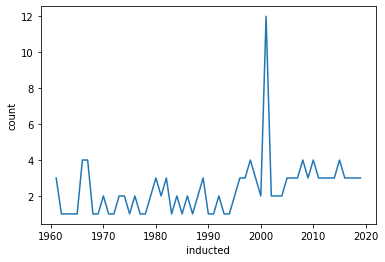

In [142]:
figsize=(20,15)
line = sns.lineplot(x='inducted', y='count', data=ind_by_year)

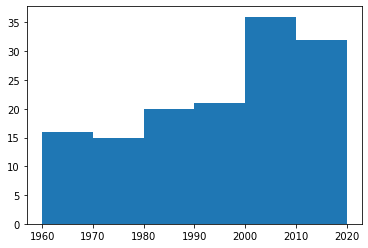

In [148]:
hist=plt.hist(hof_full.inducted, bins = [1960, 1970, 1980, 1990, 2000, 2010, 2020])